In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
df=pd.read_csv('US_covid.csv')

In [4]:
df.shape

(53848, 6)

In [5]:
df.describe()

,fips,cases,deaths
count,53132.000000,53848.000000,53848.000000
mean,29529.152036,106.149328,3.178985
std,15549.107764,1336.965313,65.751445
min,1001.000000,0.000000,0.000000
25%,17161.000000,2.000000,0.000000
50%,28135.000000,5.000000,0.000000
75%,42125.000000,22.000000,1.000000
max,56043.000000,103208.000000,6717.000000


Text(0, 0.5, 'deaths')

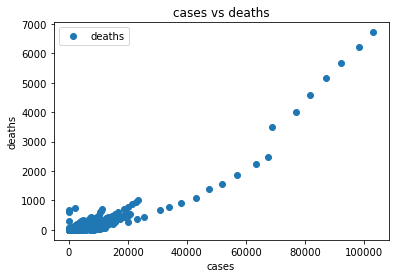

In [6]:
df.plot(x='cases',y='deaths',style='o')
plt.title('cases vs deaths')
plt.xlabel('cases')
plt.ylabel('deaths')

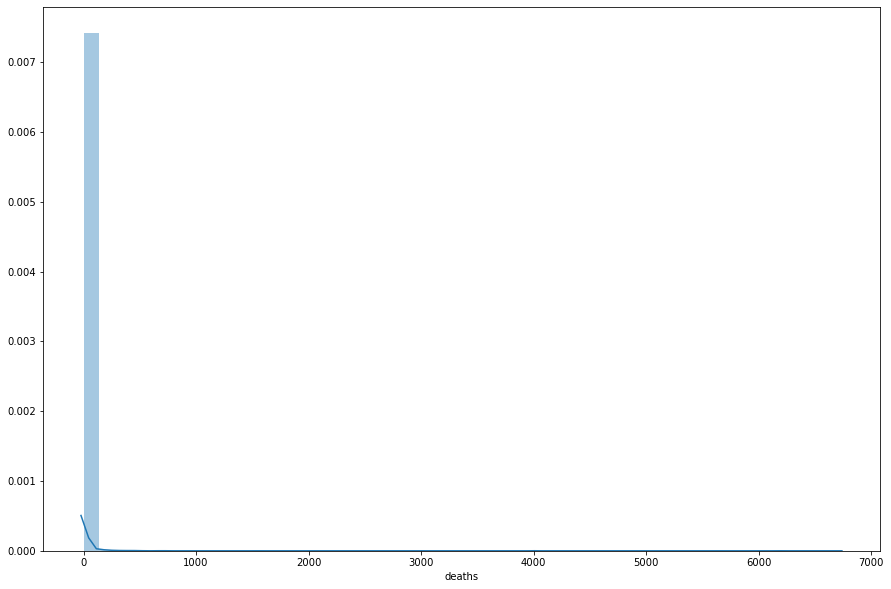

In [7]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['deaths'])

In [8]:
x=df['cases'].values.reshape(-1,1)
y=df['deaths'].values.reshape(-1,1)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(regressor.intercept_)

[-1.8110017]


In [12]:
print(regressor.coef_)

[[0.04718285]]


In [13]:
y_pred=regressor.predict(x_test)

In [14]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,0,-1.763819
1,0,-1.527905
2,0,-1.197625
3,0,-1.763819
4,2,4.511501
...,...,...
10765,0,-1.763819
10766,0,1.208701
10767,0,-1.433539
10768,0,-1.763819


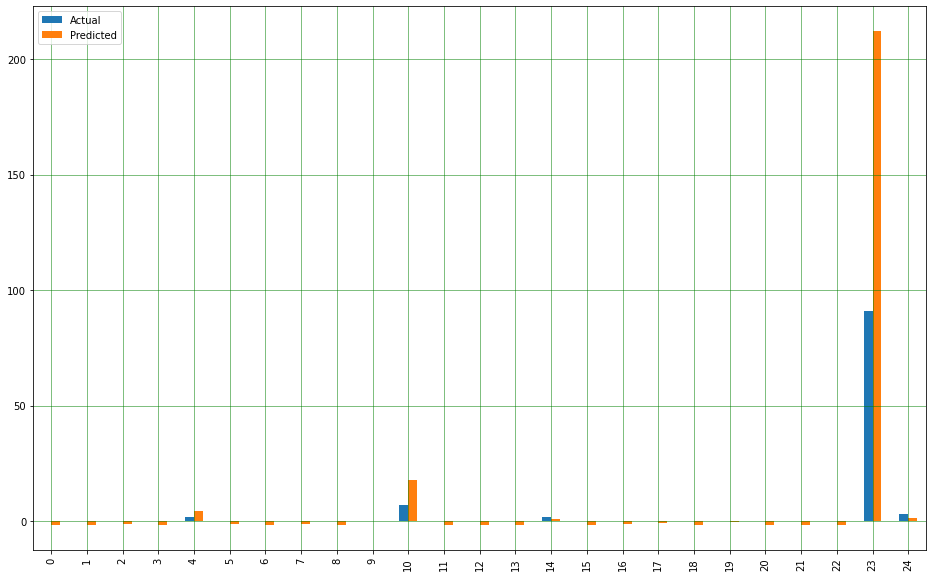

In [15]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


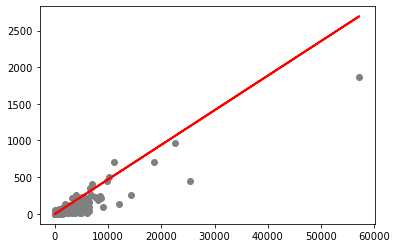

In [16]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3.24157646166187
Mean Squared Error: 285.85780342949397
Root Mean Squared Error: 16.907329872853783


In [19]:
print('Variance score: %.2f' % regressor.score(x_test, y_test))


Variance score: 0.60


In [21]:
df.head()

,Actual,Predicted
0,0,-1.763819
1,0,-1.527905
2,0,-1.197625
3,0,-1.763819
4,2,4.511501


In [22]:
from sklearn.linear_model import LogisticRegression


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()


In [29]:
logreg.fit(x_train,y_train)

c:\users\ayush mishra\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\ayush mishra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.75


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[12085     0     0 ...     0     0     0]
 [ 1766     0     0 ...     0     0     0]
 [  677     0     0 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     12085
           1       0.00      0.00      0.00      1766
           2       0.00      0.00      0.00       678
           3       0.00      0.00      0.00       361
           4       0.00      0.00      0.00       182
           5       0.00      0.00      0.00       131
           6       0.00      0.00      0.00       114
           7       0.00      0.00      0.00       104
           8       0.00      0.00      0.00        70
           9       0.00      0.00      0.00        62
          10       0.00      0.00      0.00        54
          11       0.02      0.09      0.03        43
          12       0.00      0.00      0.00        41
          13       0.00      0.00      0.00        44
          14       0.00      0.00      0.00        22
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

c:\users\ayush mishra\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)
y_pred=knn.predict(x)
print(metrics.accuracy_score(y,y_pred))

c:\users\ayush mishra\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7521727826474521
